# Image Augmentation using Keras

## Import of libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

import zipfile

## Definning directory

In [2]:
# local_zip = 'D:/Data/cat2dog.zip'

# zip_ref = zipfile.ZipFile(local_zip,'r')

# zip_ref.extractall('D:/Data')
# zip_ref.close()

In [25]:
base_dir = 'D:/Data/cat2dog' #change as per your path

# Defining Train & Validation drectory
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Train Directory
train_cat_dir = os.path.join(train_dir, 'trainA')
train_dog_dir = os.path.join(train_dir, 'trainB')

# Validation Directory
validation_cat_dir = os.path.join(validation_dir, 'testA')
validation_dog_dir = os.path.join(validation_dir, 'testB')

In [4]:
# Checking Filename of images
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir)

print(train_cat_fnames[0:5])
print(train_dog_fnames[0:5])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']


In [5]:
task_image_dir = os.path.join(train_cat_dir, 'task')
print(os.listdir(task_image_dir))

['0.jpg', 'train']


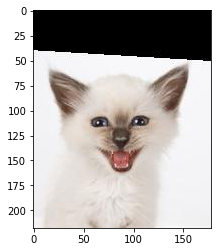

In [6]:
task_image_path = os.path.join(task_image_dir, 'train/cat/0.jpg')

plt.imshow(plt.imread(task_image_path))

# 

## Task : Rotation

In [7]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

Found 1 images belonging to 1 classes.


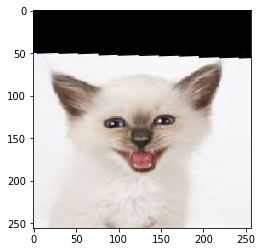

In [8]:
x, y = next(task_generator.flow_from_directory(task_image_dir,
                                               batch_size = 1
                                              ))

plt.imshow(x[0].astype('uint8'));

## Task : Width and Height shift

In [9]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range= [-20, -5 , 5 , 20],
    height_shift_range= [-5, 5]
)

Found 1 images belonging to 1 classes.


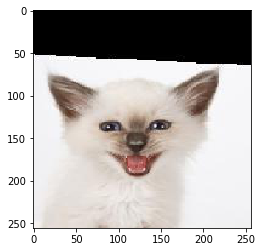

In [10]:
x,y = next(task_generator.flow_from_directory(task_image_dir,
                                             batch_size=1
                                             ))

plt.imshow(x[0].astype('uint8'))

## Task : Brightness

In [11]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 1.5)
)

Found 1 images belonging to 1 classes.


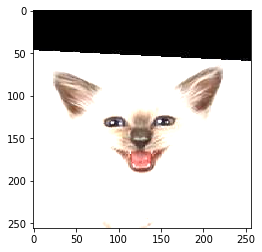

In [12]:
x, y = next(task_generator.flow_from_directory(task_image_dir,
                                              batch_size=1
                                              ))

plt.imshow(x[0].astype('uint8'))

## Task : Shear shift

In [13]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

Found 1 images belonging to 1 classes.


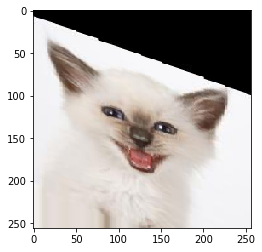

In [14]:
x, y = next(task_generator.flow_from_directory(task_image_dir,
                                              batch_size=1
                                              ))

plt.imshow(x[0].astype('uint8'))

## Task : Zoom

In [15]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.2]
)

Found 1 images belonging to 1 classes.


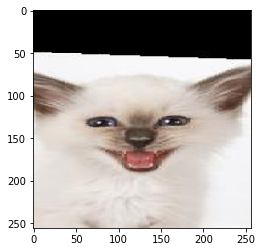

In [16]:
x, y = next(task_generator.flow_from_directory(task_image_dir,
                                              batch_size=1
                                              ))

plt.imshow(x[0].astype('uint8'))

## Task : Channel shift

Found 1 images belonging to 1 classes.


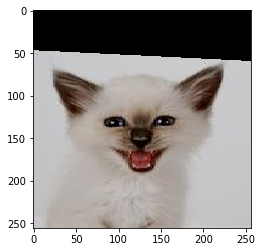

In [17]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(task_generator.flow_from_directory(task_image_dir,
                                              batch_size=1
                                              ))

plt.imshow(x[0].astype('uint8'))

## Task : Horizontal & Vertical Flip

Found 1 images belonging to 1 classes.


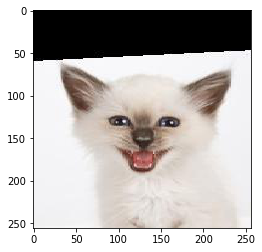

In [18]:
task_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(task_generator.flow_from_directory(task_image_dir,
                                              batch_size=1
                                              ))

plt.imshow(x[0].astype('uint8'))

## Task : Developing Model

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [21]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=10,
    width_shift_range= [-20, -5 , 5 , 20],
    height_shift_range= [-5, 5],
    brightness_range=(0.5, 1.2),
    shear_range=40,
    channel_shift_range=100,
    horizontal_flip=True
)

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   target_size = (150,150)
                                                   )

Found 2037 images belonging to 2 classes.


In [23]:
history = model.fit(train_generator,
                   epochs=1)

Train for 102 steps
102/102 [==============================] - 26s 253ms/step - loss: 0.7087 - accuracy: 0.5000


In [24]:
# Yes! it's too less but I generated this model for only Image Augmentation